https://towardsdatascience.com/word2vec-from-scratch-with-numpy-8786ddd49e72

In [1]:

%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm_notebook
import re

### Skip Gram Word to vector

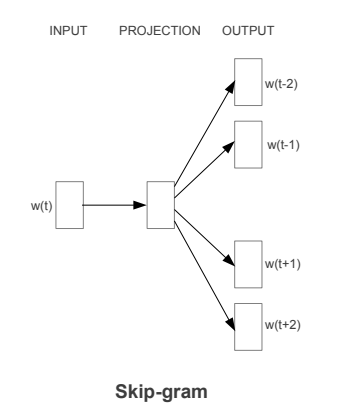

## Data Prep

In [2]:
def tokenize(text):
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        #print (i, token)
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        for j in nbr_inds:
            X.append(word_to_id[tokens[i]])
            #print(X)
            Y.append(word_to_id[tokens[j]])
            #print(Y)
            
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)
            
    return X, Y

In [16]:
X

array([[11, 11, 11,  2,  2,  2,  2,  9,  9,  9,  9,  9,  0,  0,  0,  0,
         0,  0,  2,  2,  2,  2,  2,  2, 12, 12, 12, 12, 12, 12,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  6,  6,  6,  6,  6,  6,
         2,  2,  2,  2,  2,  2,  8,  8,  8,  8,  8,  8,  5,  5,  5,  5,
         5,  5,  7,  7,  7,  7,  7,  7,  3,  3,  3,  3,  3,  4,  4,  4,
         4, 10, 10, 10]])

In [11]:
id_to_word

{0: 'of',
 1: 'investing',
 2: 'the',
 3: 'a',
 4: "loser's",
 5: 'market',
 6: 'beating',
 7: 'is',
 8: 'stock',
 9: 'deduction',
 10: 'game',
 11: 'after',
 12: 'costs'}

In [12]:
tokens

['after',
 'the',
 'deduction',
 'of',
 'the',
 'costs',
 'of',
 'investing',
 'beating',
 'the',
 'stock',
 'market',
 'is',
 'a',
 "loser's",
 'game']

In [13]:
Y

array([[ 2,  9,  0, 11,  9,  0,  2, 11,  2,  0,  2, 12, 11,  2,  9,  2,
        12,  0,  2,  9,  0, 12,  0,  1,  9,  0,  2,  0,  1,  6,  0,  2,
        12,  1,  6,  2,  2, 12,  0,  6,  2,  8, 12,  0,  1,  2,  8,  5,
         0,  1,  6,  8,  5,  7,  1,  6,  2,  5,  7,  3,  6,  2,  8,  7,
         3,  4,  2,  8,  5,  3,  4, 10,  8,  5,  7,  4, 10,  5,  7,  3,
        10,  7,  3,  4]])

In [14]:
np.arange(m)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [15]:
doc = "After the deduction of the costs of investing, " \
      "beating the stock market is a loser's game."
tokens = tokenize(doc)
word_to_id, id_to_word = mapping(tokens)
X, Y = generate_training_data(tokens, word_to_id, 3)
vocab_size = len(id_to_word)
m = Y.shape[1]
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1

In [39]:
from numpy import savetxt
savetxt("data.csv",Y_one_hot,delimiter =',')
savetxt("W.csv",params['W'],delimiter =',')
savetxt("WRD_EMB.csv",word_vec,delimiter =',')

## Initialization

In [23]:
def initialize_wrd_emb(vocab_size, emb_size):
    """
    vocab_size: int. vocabulary size of your corpus or training data
    emb_size: int. word embedding size. How many dimensions to represent each vocabulary
    """
    WRD_EMB = np.random.randn(vocab_size, emb_size) * 0.01
    
    assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

def initialize_dense(input_size, output_size):
    """
    input_size: int. size of the input to the dense layer
    output_szie: int. size of the output out of the dense layer
    """
    W = np.random.randn(output_size, input_size) * 0.01
    
    assert(W.shape == (output_size, input_size))
    return W

def initialize_parameters(vocab_size, emb_size):
    WRD_EMB = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)
    
    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB
    parameters['W'] = W
    
    return parameters

In [69]:
params = initialize_parameters(13, 50)
params['W'].shape

(13, 50)

## Forward Propagation

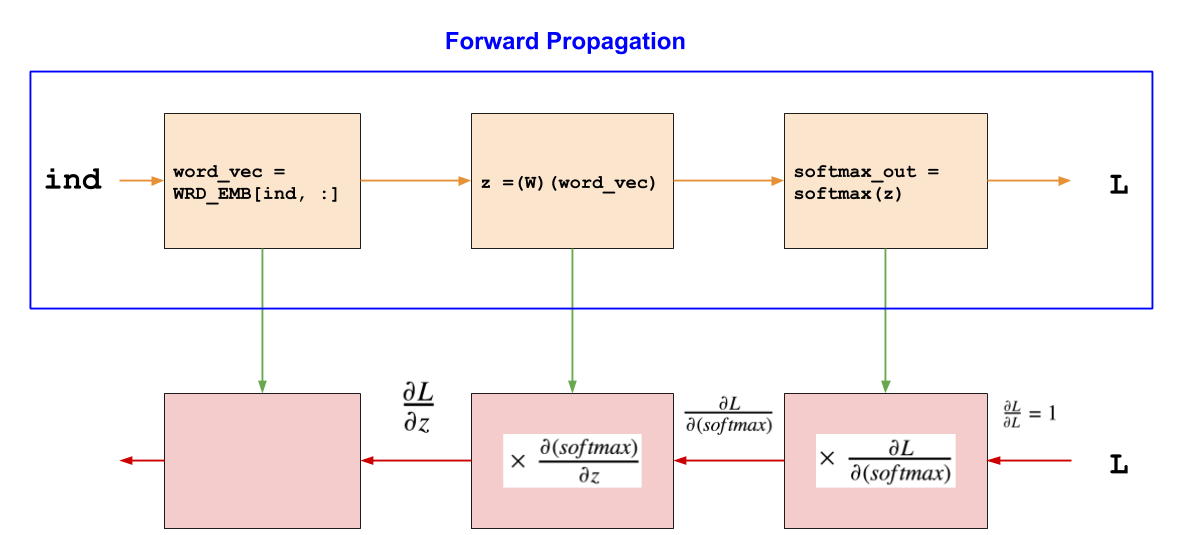

In [86]:
m = X.shape[1]
print('training examples: {}'.format(m))
WRD_EMB = params['WRD_EMB']
print('Word Embedding matrix size: {}'.format(WRD_EMB.shape))
inds = X[:, 0:0+256]
word_vec = WRD_EMB[inds.flatten(), :].T #inds.flattns is just to select how big a batch size you need for training 
print('Word vector matrix size: {}'.format(word_vec.shape))

training examples: 84
Word Embedding matrix size: (13, 50)
Word vector matrix size: (50, 84)


In [17]:
def ind_to_word_vecs(inds, parameters):
    """
    inds: numpy array. shape: (1, m)
    parameters: dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T
    
    assert(word_vec.shape == (WRD_EMB.shape[1], m))
    
    return word_vec


### Dense Layer Operation

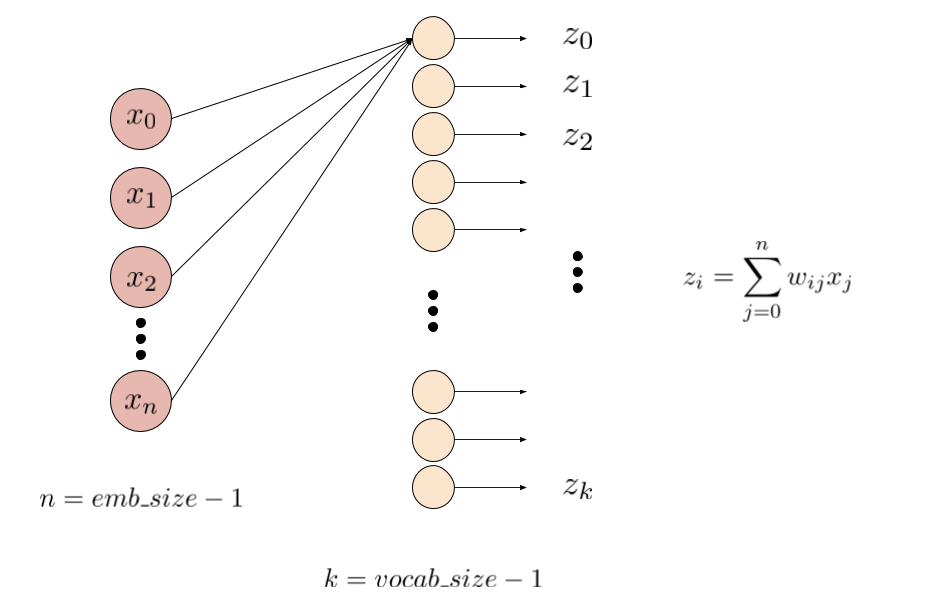

In [ ]:
def linear_dense(word_vec, parameters):
    """
    word_vec: numpy array. shape: (emb_size, m)
    parameters: dict. weights to be trained
    """
    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)
    
    assert(Z.shape == (W.shape[0], m))
    
    return W, Z



### Softmax function

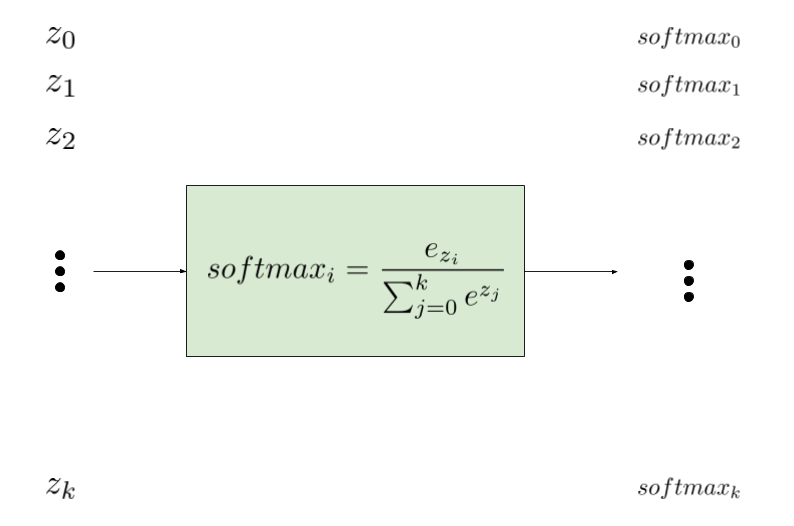


In [ ]:
def softmax(Z):
    """
    Z: output out of the dense layer. shape: (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(Z), np.sum(np.exp(Z), axis=0, keepdims=True) + 0.001)
    
    assert(softmax_out.shape == Z.shape)

    return softmax_out

def forward_propagation(inds, parameters):
    word_vec = ind_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)
    
    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z
    
    return softmax_out, caches

## Cost Function

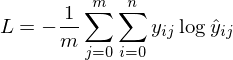

In [18]:
def cross_entropy(softmax_out, Y):
    """
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    m = softmax_out.shape[1]
    cost = -(1 / m) * np.sum(np.sum(Y * np.log(softmax_out + 0.001), axis=0, keepdims=True), axis=1)
    return cost

## Backward Propogation

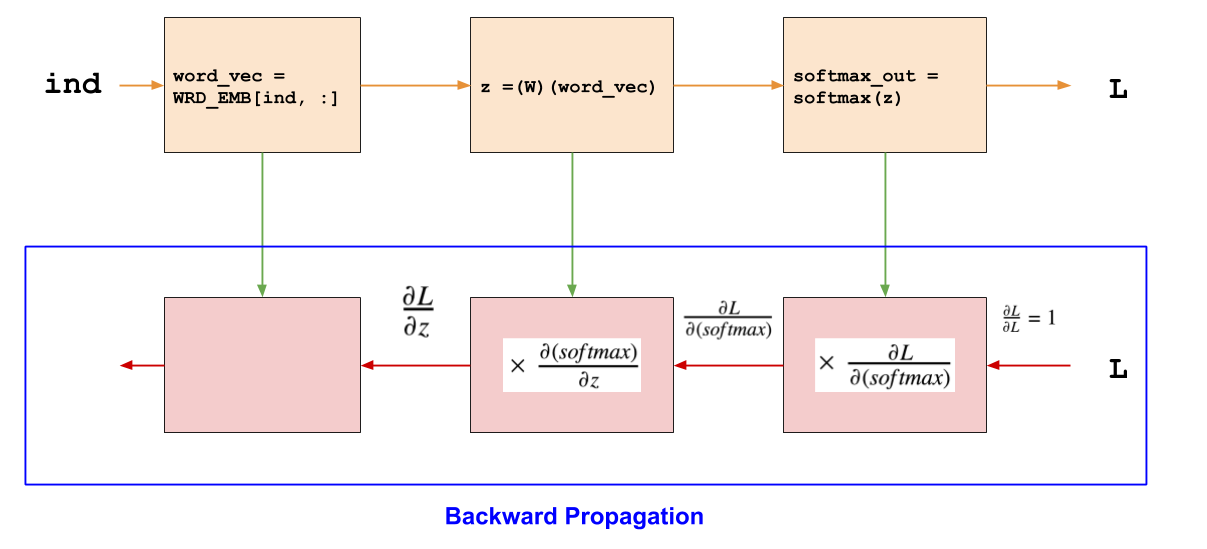

In [19]:
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape: (vocab_size, m)
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    dL_dZ = softmax_out - Y
    
    assert(dL_dZ.shape == softmax_out.shape)
    return dL_dZ

def dense_backward(dL_dZ, caches):
    """
    dL_dZ: shape: (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]
    
    dL_dW = (1 / m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert(W.shape == dL_dW.shape)
    assert(word_vec.shape == dL_dword_vec.shape)
    
    return dL_dW, dL_dword_vec

def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)
    
    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec
    
    return gradients


### Update weights
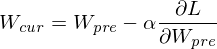

In [ ]:
def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]
    
    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']

In [35]:
list(range(0, X.shape[1], 256))
X.shape[1]

84

In [44]:
# X[:, i:i+batch_size]
X[:, 0:0+256]

array([[11, 11, 11,  2,  2,  2,  2,  9,  9,  9,  9,  9,  0,  0,  0,  0,
         0,  0,  2,  2,  2,  2,  2,  2, 12, 12, 12, 12, 12, 12,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  6,  6,  6,  6,  6,  6,
         2,  2,  2,  2,  2,  2,  8,  8,  8,  8,  8,  8,  5,  5,  5,  5,
         5,  5,  7,  7,  7,  7,  7,  7,  3,  3,  3,  3,  3,  4,  4,  4,
         4, 10, 10, 10]])

In [64]:
inds = Y_one_hot[:, 0:0+256].shape

(1, 80)

In [20]:
from datetime import datetime

import matplotlib.pyplot as plt


def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, 
                            parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    begin_time = datetime.now()
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
#         print(batch_inds)
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]

            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)
            
        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))
            
    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

In [21]:
vocab_size

13

training time: 0:00:00.986191


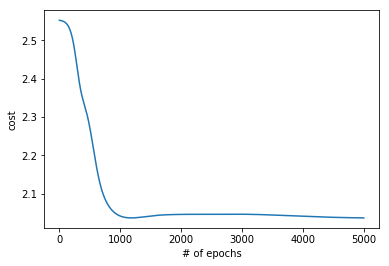

In [24]:
paras = skipgram_model_training(X, Y_one_hot, vocab_size, 50, 0.05, 5000, \
                                batch_size=128, parameters=None, print_cost=False)

## Evaluate

In [25]:
X_test = np.arange(vocab_size)
X_test = np.expand_dims(X_test, axis=0)
softmax_test, _ = forward_propagation(X_test, paras)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]

In [26]:
for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
    print("{}'s neighbor words: {}".format(input_word, output_words))

of's neighbor words: ['the', 'of', 'costs', 'beating']
investing's neighbor words: ['the', 'stock', 'beating', "loser's"]
the's neighbor words: ['is', 'of', 'beating', 'stock']
a's neighbor words: ['game', 'market', 'stock', "loser's"]
loser's's neighbor words: ['game', 'market', 'stock', "loser's"]
market's neighbor words: ['is', "loser's", 'a', 'beating']
beating's neighbor words: ['market', 'stock', 'investing', 'costs']
is's neighbor words: ['game', 'market', 'stock', "loser's"]
stock's neighbor words: ['investing', 'a', 'is', 'market']
deduction's neighbor words: ['costs', 'after', 'the', 'beating']
game's neighbor words: ['is', "loser's", 'a', 'beating']
after's neighbor words: ['of', 'the', 'deduction', 'costs']
costs's neighbor words: ['beating', 'of', 'deduction', 'the']


### Language modles in action

https://transformer.huggingface.co/